# What we see in Hi-C: Introduction to chromatin biology and sequencing assays, Hi-C data browsing and feature extraction

Welcome to the workshop "What can we see in Hi-C?" by Aleksandra Galitsyna.

This is a two-part intro to Hi-C data analysis:

- Part I covers qualitative Hi-C data analysis in interactive browsers (higlass, resgen)
- Part II shows how to use flexibility of Python programming for whole-genome visualization, compartments, domains and scaling analysis of Hi-C with [Open2C tools](https://github.com/open2c).

Disclaimer: although we formally refer to whole-genome chromosome capture data as Hi-C, we will mostly work with Micro-C here.

Author: Aleksandra Galitsyna, based on the materials from [Open2C](https://github.com/open2c) and [4DN](https://www.4dnucleome.org/software/) communities.

For any questions, feel free to reach out to galitsyn at mit dot edu

### 0. Open this notebook on a machine and install the requirements

You have two options to run this notebook:

#### Plan A. Open in Google Colab and run the following lines:

<a target="_blank" href="https://colab.research.google.com/github/mirnylab/Hi-C_Workshop/blob/main/What_we_see_in_Hi-C_3June2025.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [5]:
!pip install ipykernel cooler==0.10.3 bioframe==0.8.0 higlass-python==1.3.3 pysam
!pip install git+https://github.com/open2c/cooltools.git # Note that this will ensure you can use automatic data download API
!pip install matplotlib==3.10.* seaborn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 36.7 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5031 sha256=849955fd330f6b0f75d10313a358bd1d35a5d1b48d365e69239f22448079859e
  Stored in directory: /root/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree
  Cloning https://github.com/open2c/cooltools.git to /tmp/pip-req-build-g37_cb9n
  Running command git clone --fi

#### Plan B. Open some Linux-based server, launch terminal, install dependencies, git-clone and open the notebook

In [6]:
# %%bash
# conda create -n hic_open2c_workshop python=3.13
# conda activate hic_open2c_workshop
# pip install ipykernel cooler==0.10.3 bioframe==0.8.0 higlass-python==1.3.3 pysam
# pip install git+https://github.com/open2c/cooltools.git
# pip install matplotlib==3.10.* seaborn
# python -m ipykernel install --user --name hic_open2c_workshop --display-name "hic_open2c_workshop"

In [7]:
# !git clone https://github.com/mirnylab/Hi-C_Workshop.git

Select the 'hic_open2c_workshop' enviroment in your notebook.

Please, note that the workshop is designed to run in the Linux-based system with conda and pip access.
If you are using MacOS or Windows, you may install the dependencies in the way preferable for these systems.
However, we cannot guarantee that all elements of this notebook will work in these systems.

Depending on the notebook version, you might need to activate widgets support for jupyter lab.

#### Check that imports run

In [8]:
import higlass as hg
import cooltools
import cooler
import bioframe
import matplotlib

In [9]:
print("Matplotlib: ", matplotlib.__version__)
print("HiGlass Python: ", hg.__version__)
print("Cooler: ", cooler.__version__)
print("Bioframe: ", bioframe.__version__)
print("Cooltools: ", cooltools.__version__)

Matplotlib:  3.10.0
HiGlass Python:  1.3.3
Cooler:  0.10.3
Bioframe:  0.8.0
Cooltools:  0.7.1


No error during running these cells means that the installation and preparation of the environment was successful.
Warnings are also fine.

In [10]:
# Let's ignore warnings for now:
import warnings
warnings.filterwarnings('ignore')

## Part I. Qualitative analysis of Hi-C maps

Qualitative Hi-C data anlaysis is the first step for generation of hypothesis, quality checks, etc. It involves eye-balling, loading and comparing various datasets from genomics and epigenetics. Here, we will learn how to do that with interactive browsers.


### 1. Databases for Hi-C-type data

#### 1.1. Find public Hi-C dataset.

Hi-C data can be found at various public databases, including broad-range sequencing storages (GEO, SRA, ENA, ArrayExpress, DDBJ), [ENCODE](https://www.encodeproject.org/matrix/?type=Experiment&control_type!=*&status=released&perturbed=false&assay_title=intact+Hi-C&assay_title=in+situ+Hi-C&assay_title=dilution+Hi-C) and [4DN Data Portal](https://data.4dnucleome.org/).

We will practice with 4DN.
[4DN](https://data.4dnucleome.org/) deposits raw sequencing data, processed data in widely accepted formats (.hic and .mcool) and annotation tracks (such as insulation and compartments).


▸ **Practice task. Get familiar with 4DN database.**

- Go to the 4DN data portal website: https://data.4dnucleome.org/
- Select Micro-C for h1-ESC cells ("Micro-C" -> "Browse" -> Line "4DNES21D8SP8")
- Explore the data (press "Explore data button"m you will be redirected to HiGlass view with Micro-C for h1-ESC cells).


### 2. Interactive browsers for Hi-C

Let's now explore Hi-C-like data and learn how to create your own views with genomics and epigenetics datasets.
In this part, you will explore and compare chromatin organization of **mESC (mouse embryonic stem cells) cells probed by Micro-C** (high-resolution version of Hi-C).

We will explore Micro-C data from untreated cells and from Rad21, Wapl adn CTCF rapid degratation in mESC.
You can look up the details on the expertiment in the original publication: [Hsieh et al. 2022](https://www.nature.com/articles/s41588-022-01223-8).

#### 2.1. Explore Hi-C and epigenetics data with higlass and resgen (follow the lecture).

For your reference, we will cover navigating the datasets in:

- [higlass.io](https://higlass.io/), interactive browser for 3D and other genomics data
- [resgen.io](https://resgen.io/), server version of higlass, with option to deposit your own data, organize it into projects and store the views

** Disclaimer: it is highly recommended not to access resgen.io at the time of the workshop, as it might have an effect of "spam attack" on the server. **

#### 2.2. Explore Hi-C data in your notebook with higlass-python.

Next, let's explore Hi-C data of mESC in our notebooks with [higlass-python](https://github.com/higlass/higlass-python), a Python wrapper for higlass.

You may notice how similar are the generated python widgets to the higlass.io interface.


In [11]:
import higlass as hg

In [12]:
### Define the data tilesets:
mm10_genes = hg.remote(
    uid="DVuS61VhTG6DxKhlsTssTQ",
    server="https://resgen.io/api/v1",
)

tileset = hg.remote(
    uid="WmNzNu-XTieALMScNwrCZA",
    server="https://resgen.io/api/v1",
    name="Hsieh et al. (2021) mESC Micro-C",
)

### Define the view:
view = hg.view(
    mm10_genes.track("gene-annotations", height=100).opts(
        minHeight = 24,
        showMousePosition=True,
        showTooltip=True,
    ),
    tileset.track("heatmap", height=500).opts(
        minHeight = 500,
        showMousePosition=True,
        showTooltip=True,
    ),
    genomePositionSearchBox = hg.GenomePositionSearchBox(
        autocompleteServer="//higlass.io/api/v1",
        autocompleteId="QDutvmyiSrec5nX4pA5WGQ",
        chromInfoId="mm10",
        chromInfoServer="//higlass.io/api/v1",
        visible=True)
)

# Help to get access to track sources from higlass.io data sources:
list_of_track_source_servers = [
    "//higlass.io/api/v1",
    "https://resgen.io/api/v1",
    "https://resgen.io/api/v1/gt/paper-data"
  ]

# Show the view:
view.viewconf(trackSourceServers = list_of_track_source_servers, exportViewUrl = "/api/v1/viewconfs")

HiGlassWidget()

▸ **Practice task.** Zoom in and out Micro-C map. Change the color bar.

Wait for several seconds if the view is still updating.

What chromatin structures can you find? Find inter-chromosomal compartments, intra-chromosomal compartments, then domains, dots and stripes.

⏸ *5-10 mintes, feel free to ask questions.*

#### 2.3. Compare Micro-C data between mESC and rapid Rad21 degradation.

Let's compare two views, for untreated mESC (left) and IAA-treated Rad21-degron mESCs:  

In [13]:
mm10_genes = hg.remote(
    uid="DVuS61VhTG6DxKhlsTssTQ",
    server="https://resgen.io/api/v1",
)

tileset_heatmap_1 = hg.remote(
    uid="WmNzNu-XTieALMScNwrCZA",
    server="https://resgen.io/api/v1",
    name="Hsieh et al. (2021) mESC Micro-C",
)

tileset_heatmap_2 = hg.remote(
    uid="HJBk7MibTpaAo2ZAP7lG_A",
    server="https://resgen.io/api/v1",
    name="mESC Micro-C with Rad21 IAA",
)

view1 = hg.view(
    mm10_genes.track("gene-annotations", height=100).opts(
        minHeight = 24,
        showMousePosition=True,
        showTooltip=True,
    ),
    tileset_heatmap_1.track("heatmap", height=500).opts(
        minHeight = 500,
        showMousePosition=True,
        showTooltip=True,
    ),
    genomePositionSearchBox = hg.GenomePositionSearchBox(
        autocompleteServer="//higlass.io/api/v1",
        autocompleteId="QDutvmyiSrec5nX4pA5WGQ",
        chromInfoId="mm10",
        chromInfoServer="//higlass.io/api/v1",
        visible=True),
    width=6
)

view2 = hg.view(
    mm10_genes.track("gene-annotations", height=100).opts(
        minHeight = 24,
        showMousePosition=True,
        showTooltip=True,
    ),
    tileset_heatmap_2.track("heatmap", height=500).opts(
        minHeight = 500,
        showMousePosition=True,
        showTooltip=True,
    ),
    width=6
)

#In order to get access to track sources from higlass.io data sources
list_of_track_source_servers = [
    "//higlass.io/api/v1",
    "https://resgen.io/api/v1",
    "https://resgen.io/api/v1/gt/paper-data"
  ]

view_lock = hg.lock(view1, view2)
viewconf = (view1 | view2).locks(view_lock, inplace=True)
viewconf.trackSourceServers = list_of_track_source_servers
viewconf.exportViewUrl = "/api/v1/viewconfs"

viewconf

HiGlassWidget()

▸ **Practice task.** What changes between Micro-C maps do you see?

Do domains, dots and stripes change? And compartments?

⏸ *5-10 mintes, feel free to ask questions.*

#### 2.4. Compare Micro-C datasets and associate the changes with epigenetics

Let's add more information to the view:

In [14]:
mm10_genes = hg.remote(
    uid="DVuS61VhTG6DxKhlsTssTQ",
    server="https://resgen.io/api/v1",
)

tileset_heatmap_1 = hg.remote(
    uid="WmNzNu-XTieALMScNwrCZA",
    server="https://resgen.io/api/v1",
    name="Hsieh et al. (2021) mESC Micro-C",
)

tileset_heatmap_2 = hg.remote(
    uid="HJBk7MibTpaAo2ZAP7lG_A",
    server="https://resgen.io/api/v1",
    name="mESC Micro-C with Rad21 IAA",
)

tileset_ctcf = hg.remote(
    uid="H65ZUeoUSXudbspjx4LJhA",
    server="https://resgen.io/api/v1",
    name="mESC CTCF ChIP-Seq coverage",
)

tileset_H3K4me1 = hg.remote(
    uid="R-8frGVgSSejDb3HTdHcvw",
    server="https://resgen.io/api/v1",
    name="mESC H3K4me1 ChIP-Seq coverage",
)

tileset_H3K9me3 = hg.remote(
    uid="G4twI42bS-GIWIymaLreBA",
    server="https://resgen.io/api/v1",
    name="mESC H3K9me3 ChIP-Seq coverage",
)

tileset_H3K27ac = hg.remote(
    uid="WXUOiZkYRTiUtBIAP9Cy5Q",
    server="https://resgen.io/api/v1",
    name="mESC H3K27ac ChIP-Seq coverage",
)

tileset_H3K4me3 = hg.remote(
    uid="CmtC5DBbTEKhicuuL1nNOw",
    server="https://resgen.io/api/v1",
    name="mESC H3K4me3 ChIP-Seq coverage",
)

tileset_H3K27me3 = hg.remote(
    uid="PMar87awRW2MaLLsTvimcw",
    server="https://resgen.io/api/v1",
    name="mESC H3K27me3 ChIP-Seq coverage",
)

# Epilogos, or chromatin states are more complicated to include:
from typing import ClassVar
from typing_extensions import Literal

class MultivecTrack(hg.PluginTrack):
    type: Literal[
        "horizontal-stacked-bar",
    ]
    plugin_url: ClassVar[str] = (
        "https://unpkg.com/higlass-multivec/dist/higlass-multivec.min.js"
    )

track_epilogos = MultivecTrack(
    **{
        "type": "horizontal-stacked-bar",
        "tilesetUid": "WmHBFc78TmOgTCIePEwawQ",
        "server": "https://resgen.io/api/v1",
        "height": 100,
        "minHeight": 100,
    }
)

view1 = hg.view(
    mm10_genes.track("gene-annotations", height=100).opts(
        minHeight = 24,
        showMousePosition=True,
        showTooltip=True,
    ),
    (track_epilogos, "top"),
    tileset_heatmap_1.track("heatmap", height=500).opts(
        minHeight = 500,
        showMousePosition=True,
        showTooltip=True,
    ),
    (tileset_ctcf.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="black",
    ), "left"),
    (tileset_H3K4me1.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="yellow",
    ), "left"),
    (tileset_H3K4me3.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="red",
    ), "left"),
    (tileset_H3K27ac.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="orange",
    ), "left"),
    (tileset_H3K9me3.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="gray",
    ), "left"),
    (tileset_H3K27me3.track("horizontal-bar", width=30).opts(
        showMousePosition=True,
        showTooltip=True,
        barFillColor="blue",
    ), "left"),
    genomePositionSearchBox = hg.GenomePositionSearchBox(
        autocompleteServer="//higlass.io/api/v1",
        autocompleteId="QDutvmyiSrec5nX4pA5WGQ",
        chromInfoId="mm10",
        chromInfoServer="//higlass.io/api/v1",
        visible=True),
    width=6
)

view2 = hg.view(
    mm10_genes.track("gene-annotations", height=100).opts(
        minHeight = 24,
        showMousePosition=True,
        showTooltip=True,
    ),
    (track_epilogos, "top"),
    tileset_heatmap_2.track("heatmap", height=500).opts(
        minHeight = 500,
        showMousePosition=True,
        showTooltip=True,
    ),
    width=6
)

#In order to get access to track sources from higlass.io data sources
list_of_track_source_servers = [
    "//higlass.io/api/v1",
    "https://resgen.io/api/v1",
    "https://resgen.io/api/v1/gt/paper-data"
  ]

view_lock = hg.lock(view1, view2)
viewconf = (view1 | view2).locks(view_lock, inplace=True)
viewconf.trackSourceServers = list_of_track_source_servers
viewconf.exportViewUrl = "/api/v1/viewconfs"

viewconf

HiGlassWidget()

! Warning:
Run the cell again if it produces an error!

! Warning: Navigation might be slower due to larger amounts of data you view at the same time!

▸ **Practice task.** Navigate to the gene-scale view. For example, search for one of the genes CSNK1A1L, HMCN1, GPATCH2, or LPIN1, and zom out to +- 1-5 Mb around that gene.

What histone modifications are enriched around these genes?

What structures are associated with these modifications?

Are these structures affected by Rad21 degradation?

**Hints and further directions:**

Find H3K27ac-enriched regions. What happens to them?

Find H3K27me3-enriched regions. What happens to them?

⏸ *10-15 mintes break to rest, ask questions and complete this open-end task.*

## Part II. Quantitative analysis of Hi-C maps

Computationally, we think of Hi-C map as a 2-dimensional matrix with numbers. Each row and column corresponds to the bin in the genome, and the number represents the probability of interactions between corresponding two bins. Let's learn how to work with it in Python.

This part of workshop is based on the efforts of [Open Chromosome Community (Open2C)](https://open2c.github.io/) of developers who create the tools for simpler and better analysis of Hi-C. Check out our software: https://github.com/open2c and Twitter where we frequently post tutorials, preprints and papers: https://twitter.com/Open2C_team



For more detailed examples of Hi-C data analysis, see Open2C examples: https://github.com/open2c/open2c_examples


**Important notes:**
- In this practical task, you will learn how to work with the same mESC Micro-C datasets.
- We selected only two chromosomes (chr1 and chr12) from this rich data to make the computations faster.

### 1. Load and navigate Hi-C in Python

Import python libraries that we will need in almost all insulation/compartments/scalings analysis:

In [15]:
### Standard python libraries:

# Data analysis/manipulation:
import numpy as np
import pandas as pd

# visualization:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 8
from matplotlib import colors
import mpl_toolkits
import seaborn as sns

# Operation system and subprocesses control:
import os
import subprocess

###  Libraries for Hi-C and epigenetics data analysis
import cooler
import cooltools
import bioframe

Now, let's list the datasets avaliable to you. We provide them as part of cooltools standard data. You need mESC Micro-C data:

In [16]:
cooltools.print_available_datasets()

1) HFF_MicroC : Micro-C data from HFF human cells for two chromosomes (hg38) in a multi-resolution mcool format. Krietenstein et al. 2021 data. 
	Downloaded from https://osf.io/3h9js/download 
	Stored as test.mcool 
	Original md5sum: e4a0fc25c8dc3d38e9065fd74c565dd1

2) hESC_MicroC : Micro-C data from human ES cells for two chromosomes (hg38) in a multi-resolution mcool format. Krietenstein et al. 2021 data. 
	Downloaded from https://osf.io/3kdyj/download 
	Stored as test_hESC.mcool 
	Original md5sum: ac0e636605505fb76fac25fa08784d5b

3) HFF_CTCF_fc : ChIP-Seq fold change over input with CTCF antibodies in HFF cells (hg38). Downloaded from ENCODE ENCSR000DWQ, ENCFF761RHS.bigWig file 
	Downloaded from https://osf.io/w92u3/download 
	Stored as test_CTCF.bigWig 
	Original md5sum: 62429de974b5b4a379578cc85adc65a3

4) HFF_CTCF_binding : Binding sites called from CTCF ChIP-Seq peaks for HFF cells (hg38). Peaks are from ENCODE ENCSR000DWQ, ENCFF498QCT.bed file. The motifs are called with gimm

Download test data for mESC cells, or set up the oaths manually to the downloaded folder from Google Drive:

In [17]:
# download test data
# this file is ~200 Mb, and may take a few seconds to download

data_dir = './data/'

# Online version:
cool_file_ut = cooltools.download_data("mESC_dRAD21_UT", cache=True, data_dir=data_dir)

# Offline version:
# Or: cool_file_ut = "./data/mESC_dRAD21_UT.chr1-chr12-only.mm10.mapq_30.1000.mcool"
print(cool_file_ut)

Test dataset mESC_dRAD21_UT (file dRAD21_UT.mm10.mapq_30.mcool) is not in the cache directory ./data/
downloading: https://osf.io/u75pd/download as ./data/dRAD21_UT.mm10.mapq_30.mcool
./data/dRAD21_UT.mm10.mapq_30.mcool


Repeat the same for Rad21 and other degradations:

In [18]:
cool_file_rad21 = cooltools.download_data("mESC_dRAD21_IAA", cache=True, data_dir=data_dir)
cool_file_ctcf = cooltools.download_data("mESC_dCTCF_IAA", cache=True, data_dir=data_dir)
cool_file_wapl = cooltools.download_data("mESC_dWAPL_IAA", cache=True, data_dir=data_dir)

Test dataset mESC_dRAD21_IAA (file dRAD21_IAA.mm10.mapq_30.mcool) is not in the cache directory ./data/
downloading: https://osf.io/5xaut/download as ./data/dRAD21_IAA.mm10.mapq_30.mcool
Test dataset mESC_dCTCF_IAA (file dCTCF_IAA.mm10.mapq_30.mcool) is not in the cache directory ./data/
downloading: https://osf.io/xwy9j/download as ./data/dCTCF_IAA.mm10.mapq_30.mcool
Test dataset mESC_dWAPL_IAA (file dWAPL_IAA.mm10.mapq_30.mcool) is not in the cache directory ./data/
downloading: https://osf.io/fk74t/download as ./data/dWAPL_IAA.mm10.mapq_30.mcool


Let's learn more about `cool` data and its content:

In [19]:
# to print which resolutions are stored in the mcool, use list_coolers
cooler.fileops.list_coolers(cool_file_ut)

['/resolutions/1000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/30000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000']

Load cooler file to Python:

In [20]:
### to load a cooler with a specific resolution use the following syntax:
clr = cooler.Cooler(f'{cool_file_ut}::resolutions/1000000')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

chromosomes: ['chr1', 'chr12'], binsize: 1000000


In [21]:
clr.bins()[:]

chrom      start        end    weight
0     chr1          0    1000000       NaN
1     chr1    1000000    2000000       NaN
2     chr1    2000000    3000000       NaN
3     chr1    3000000    4000000  0.006833
4     chr1    4000000    5000000  0.005238
..     ...        ...        ...       ...
312  chr12  116000000  117000000  0.004172
313  chr12  117000000  118000000  0.004339
314  chr12  118000000  119000000  0.005840
315  chr12  119000000  120000000  0.007471
316  chr12  120000000  120129022       NaN

[317 rows x 4 columns]

In [22]:
clr.pixels()[:10]

bin1_id  bin2_id   count
0        3        3  119676
1        3        4   17453
2        3        5    2244
3        3        6    1653
4        3        7    1011
5        3        8     757
6        3        9     745
7        3       10     688
8        3       11     578
9        3       12     597

In [23]:
### load Rad21 IAA cooler:
clr_rad21 = cooler.Cooler(f'{cool_file_rad21}::resolutions/1000000')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

chromosomes: ['chr1', 'chr12'], binsize: 1000000


#### 1.1. View multiple chromosomes

Create the list of available chromosomes for visualization:


In [24]:
### to make a list of chromosome start/ends in bins:
chromstarts = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

chr1 : (np.int64(0), np.int64(196))
chr12 : (np.int64(196), np.int64(317))


Load the whole matrix into the memory:

In [25]:
data = clr.matrix(balance=True)[:]

In [26]:
data

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 4.52955301, 0.43104633,
               nan],
       [       nan,        nan,        nan, ..., 0.43104633, 4.53799588,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

Visualize both available chromosomes:

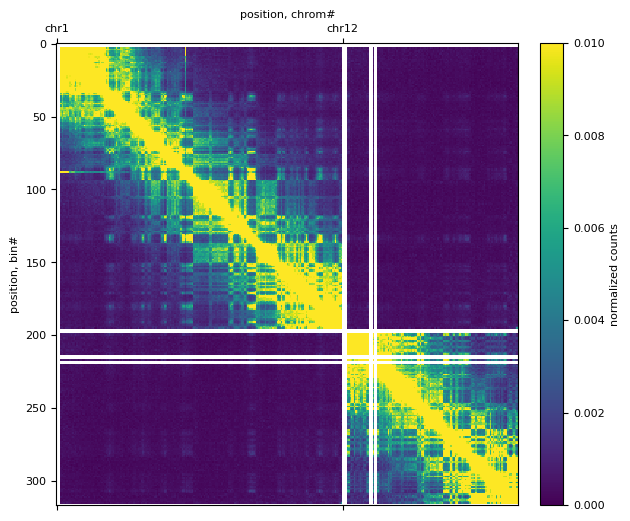

In [27]:
# Create an image:
f, ax = plt.subplots(figsize=(7,6))

# Display cooler matrix:
im = ax.matshow(data, vmax=1e-2);

plt.colorbar(im, fraction=0.046, pad=0.04, label='normalized counts');

ax.set(xticks=chromstarts,
       xticklabels=clr.chromnames,
       xlabel='position, chrom#',
       ylabel='position, bin#')
ax.xaxis.set_label_position('top')

#### 1.2. View regions of chromosomes

Below, we fetch and plot an individual chromosome (left) and a region of a chromosome (right) using `clr.fetch()`

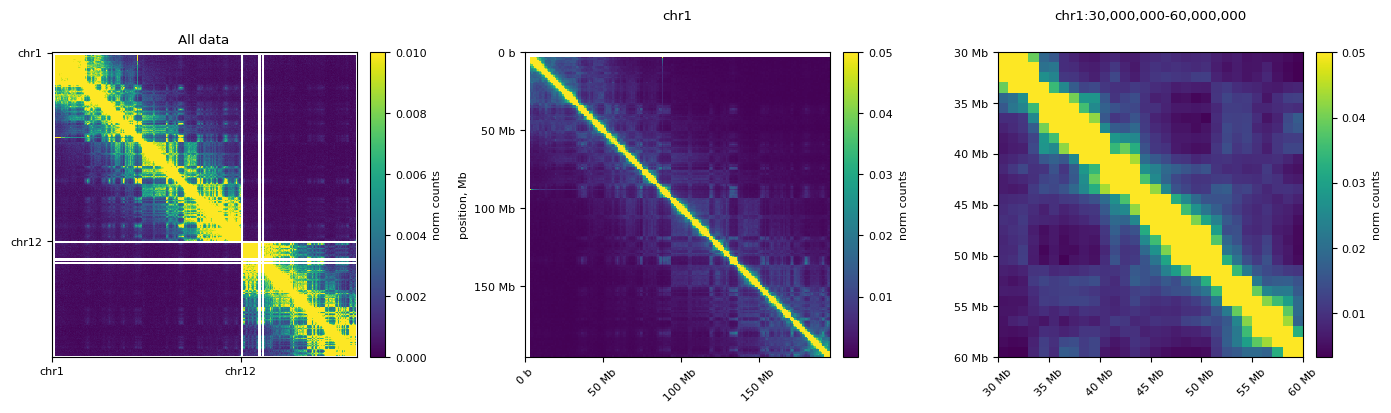

In [28]:
# to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

# Create the figure:
f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

# Left figure: all data
data = clr.matrix(balance=True)[:]

ax = axs[0]
im = ax.matshow(data, vmax=1e-2);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_xticks(chromstarts)
ax.set_xticklabels(clr.chromnames)
ax.set_yticks(chromstarts)
ax.set_yticklabels(clr.chromnames)
ax.xaxis.tick_bottom()
ax.set_title('All data')

# Center figure: chr17
data_chr17 = clr.matrix(balance=True).fetch('chr1')

ax = axs[1]
im = ax.matshow(
    data_chr17,
    vmax=5e-2,
    extent=(0, clr.chromsizes['chr1'], clr.chromsizes['chr1'], 0)
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title('chr1', y=1.08)
ax.set_ylabel('position, Mb')
format_ticks(ax)

# Right figure: region of chr17
start, end = 30_000_000, 60_000_000
region = ('chr1', start, end)
data_region = clr.matrix(balance=True).fetch(region)

ax = axs[2]
im = ax.matshow(
    data_region,
    vmax=5e-2,
    extent=(start, end, end, start)
);
ax.set_title(f'chr1:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
format_ticks(ax)
plt.tight_layout()

#### 1.3. Logarithmic color scale

Hi-C/Micro-C data has a high dynamic range, we often plot the data in log-scale. This enables simultaneous visualization of features near and far from the diagonal in a consistent colorscale.

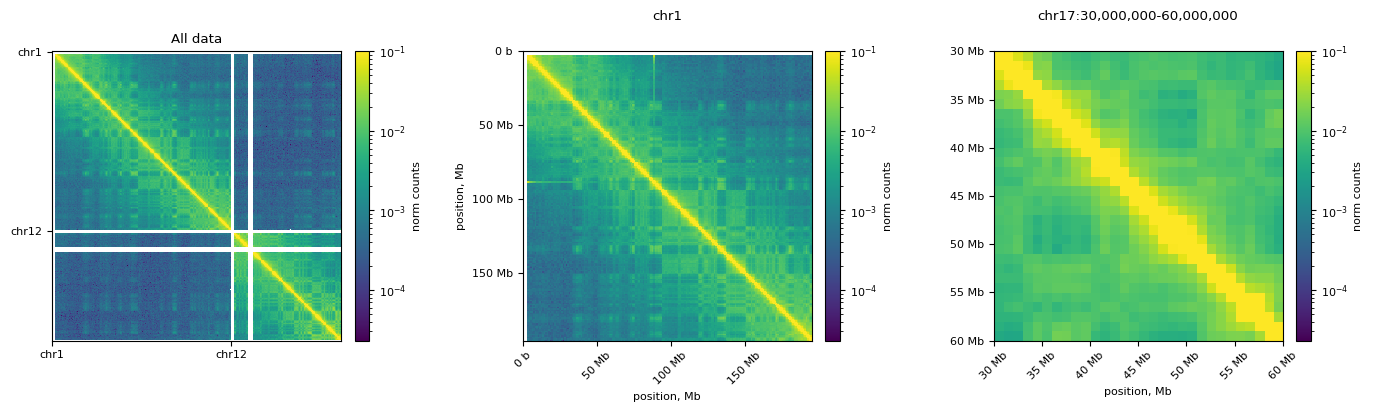

In [30]:
# plot heatmaps at megabase resolution with 3 levels of zoom in log-scale with a consistent colormap#
from matplotlib.colors import LogNorm

# Create the figure:
f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')

# Normalized scale:
norm = LogNorm(vmax=1e-1)

# Left figure: all data
data = clr.matrix(balance=True)[:]

ax = axs[0]
im = ax.matshow(
    data,
    norm=norm,
)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_xticks(chromstarts)
ax.set_xticklabels(clr.chromnames)
ax.set_yticks(chromstarts)
ax.set_yticklabels(clr.chromnames)
ax.xaxis.tick_bottom()
ax.set_title('All data')

# Center figure: chr17
data_chr17 = clr.matrix(balance=True).fetch('chr1')

ax = axs[1]
im = ax.matshow(
    data_chr17,
    norm=norm,
    extent=(0, clr.chromsizes['chr1'], clr.chromsizes['chr1'], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='norm counts');
ax.set_title('chr1', y=1.08)
ax.set(ylabel='position, Mb', xlabel='position, Mb')
format_ticks(ax)


# Right figure: region of chr17
start, end = 30_000_000, 60_000_000
region = ('chr1', start, end)
data_region = clr.matrix(balance=True).fetch(region)

ax = axs[2]
im = ax.matshow(
    data_region,
    norm=norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr17:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='norm counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)
plt.tight_layout()

#### 1.4. Colormaps

In different papers people prefer to use various color schemes that represent the data better.

`cooltools.lib.plotting` registers a set of colormaps that are useful for visualizing C data.
In particular, the `fall` colormap (inspired by [colorbrewer](https://colorbrewer2.org/#type=sequential&scheme=YlOrRd&n=9)) offers a high dynamic range, linear, option for visualizing Hi-C matrices. This often displays features more clearly than red colormaps.


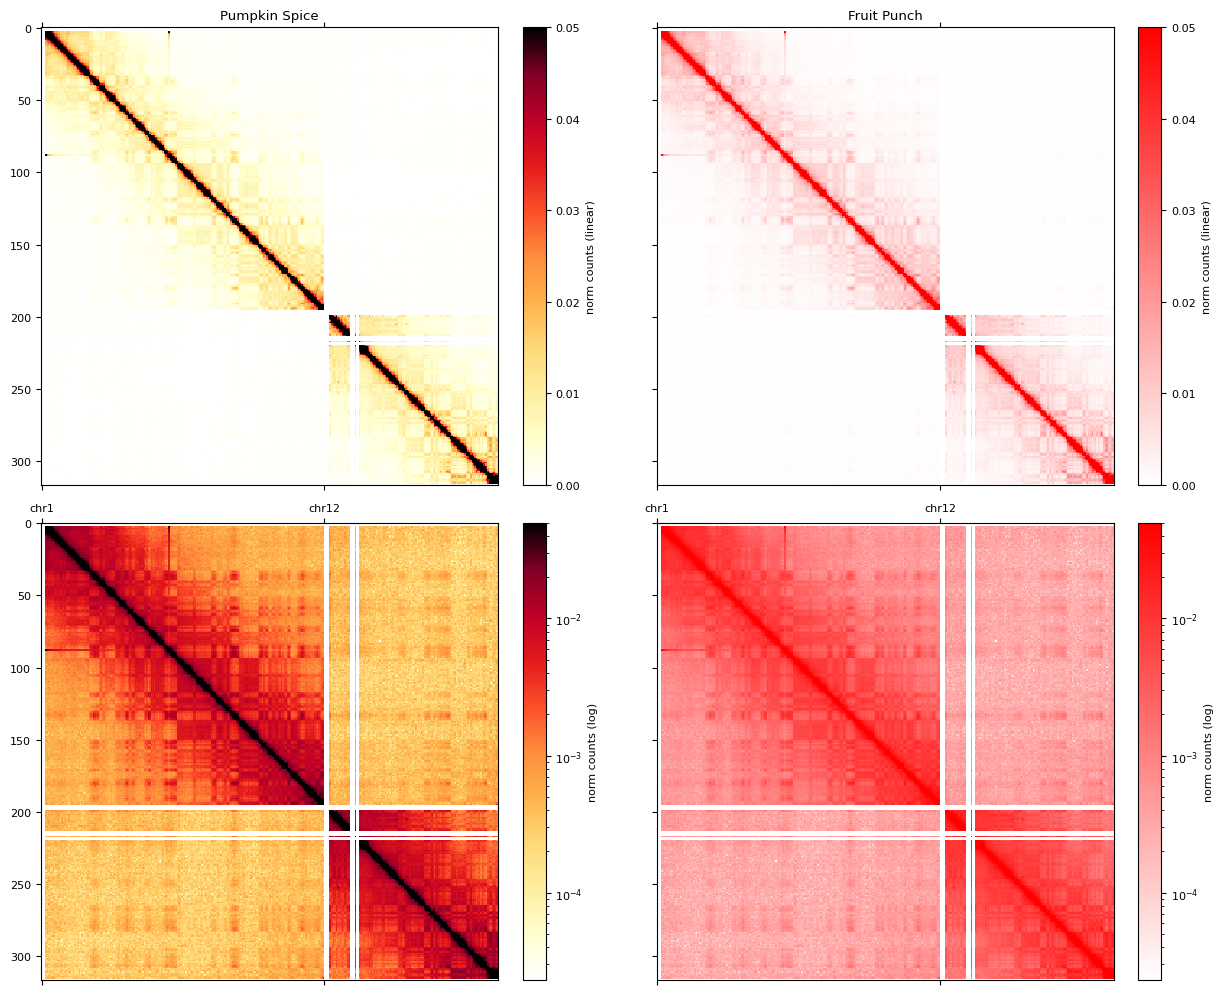

In [31]:
### plot the corrected data in fall heatmap and compare to the white-red colormap ###
### thanks for the alternative colormap naming to https://twitter.com/HiC_memes/status/1286326919122825221/photo/1###
import cooltools.lib.plotting

vmax = 5e-2
norm = LogNorm(vmax=vmax)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=2,
    ncols=2,
    sharex=True, sharey=True)

ax = axs[0, 0]
ax.set_title('Pumpkin Spice')
im = ax.matshow(clr.matrix(balance=True)[:], vmax=vmax, cmap='fall');
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts (linear)');
plt.xticks(chromstarts,clr.chromnames);

ax = axs[0, 1]
ax.set_title('Fruit Punch')
im3 = ax.matshow(clr.matrix(balance=True)[:], vmax=vmax, cmap=fruitpunch);
plt.colorbar(im3, ax=ax, fraction=0.046, pad=0.04, label='norm counts (linear)');
plt.xticks(chromstarts,clr.chromnames);

ax = axs[1, 0]
im = ax.matshow(clr.matrix(balance=True)[:], norm=norm, cmap='fall');
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts (log)');
plt.xticks(chromstarts,clr.chromnames);

ax = axs[1, 1]
im3 = ax.matshow(clr.matrix(balance=True)[:], norm=norm, cmap=fruitpunch);
plt.colorbar(im3, ax=ax, fraction=0.046, pad=0.04, label='norm counts (log)');
plt.xticks(chromstarts,clr.chromnames);

plt.tight_layout()

The utility of fall colormaps becomes more noticeable at higher resolutions and higher degrees of zoom.

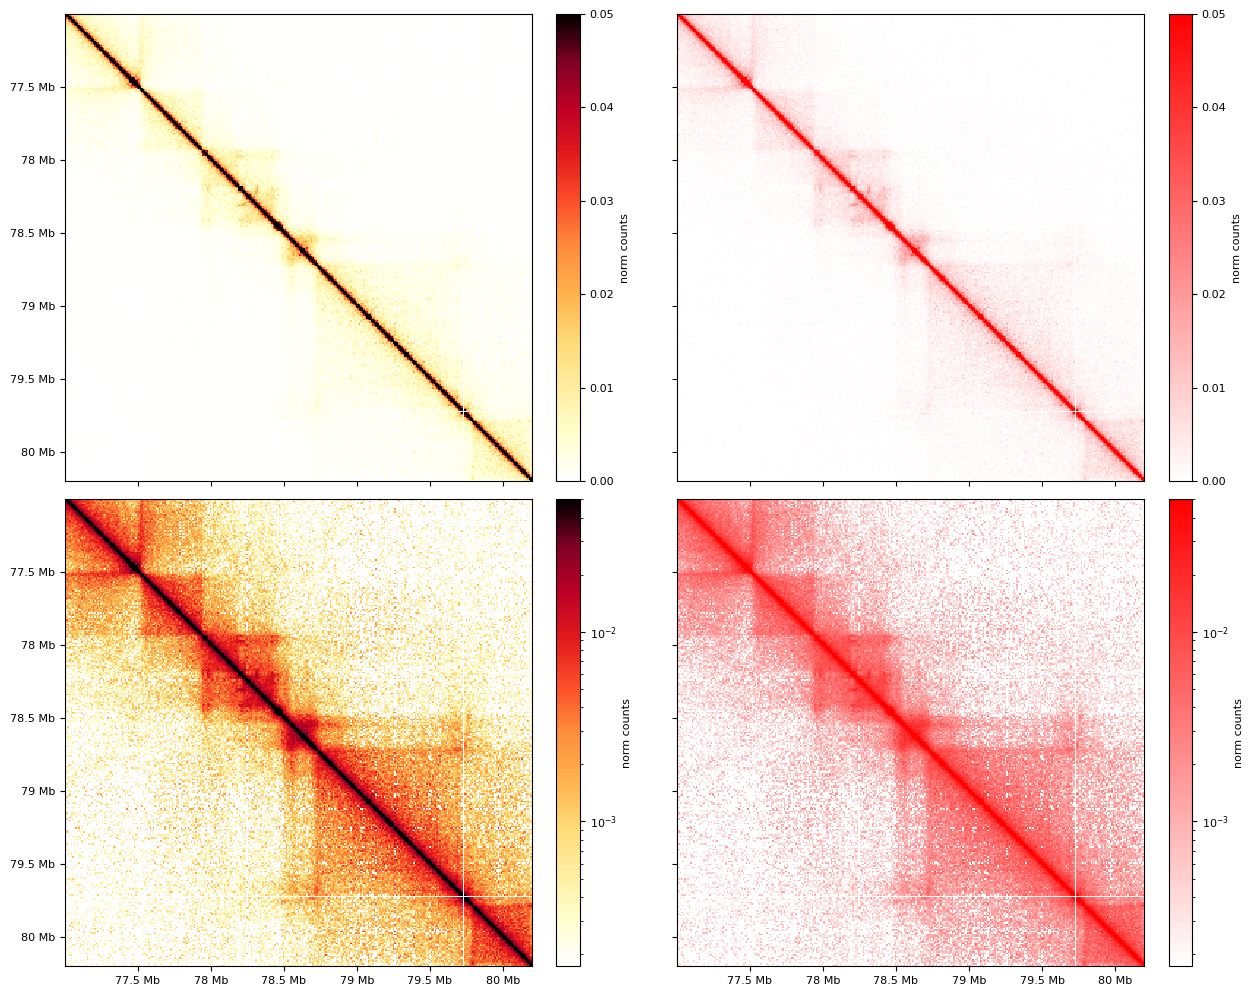

In [40]:
import cooltools.lib.plotting
clr_10kb = cooler.Cooler(f'{cool_file_ut}::resolutions/10000')

region = 'chr1:77000267-80198136'
chrom, start, end = bioframe.parse_region_string(region)
extents = (start, end, end, start)

vmax=5e-2
norm = LogNorm(vmax=vmax)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=2,
    ncols=2,
    sharex=True,
    sharey=True
)

ax = axs[0, 0]
im = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap='fall',
    vmax=vmax,
    extent=extents
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');

ax = axs[0, 1]
im2 = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap=fruitpunch,
    vmax=vmax,
    extent=extents
);
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, label='norm counts');

ax = axs[1, 0]
im = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');

ax = axs[1, 1]
im2 = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap=fruitpunch,
    norm=norm,
    extent=extents
);
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, label='norm counts');

for ax in axs.ravel():
    format_ticks(ax, rotate=False)
plt.tight_layout()

#### 1.5. Compare Micro-C for untreated and IAA-treated Rad21 degron cells

▸ **Practice task.**

Select the region you like (might be the region you explored in resgen). Make sure you select ~ 1-5 Mb size region from chr1 or chr12.

Visualize that region with the color scheme and scale that you find instructuve and interesting.

Repeat the same for both mESC and IAA-treated Rad21 degron cells. What is the major difference between them?

⏸ 5-10 minutes: take your time and ask any questions.

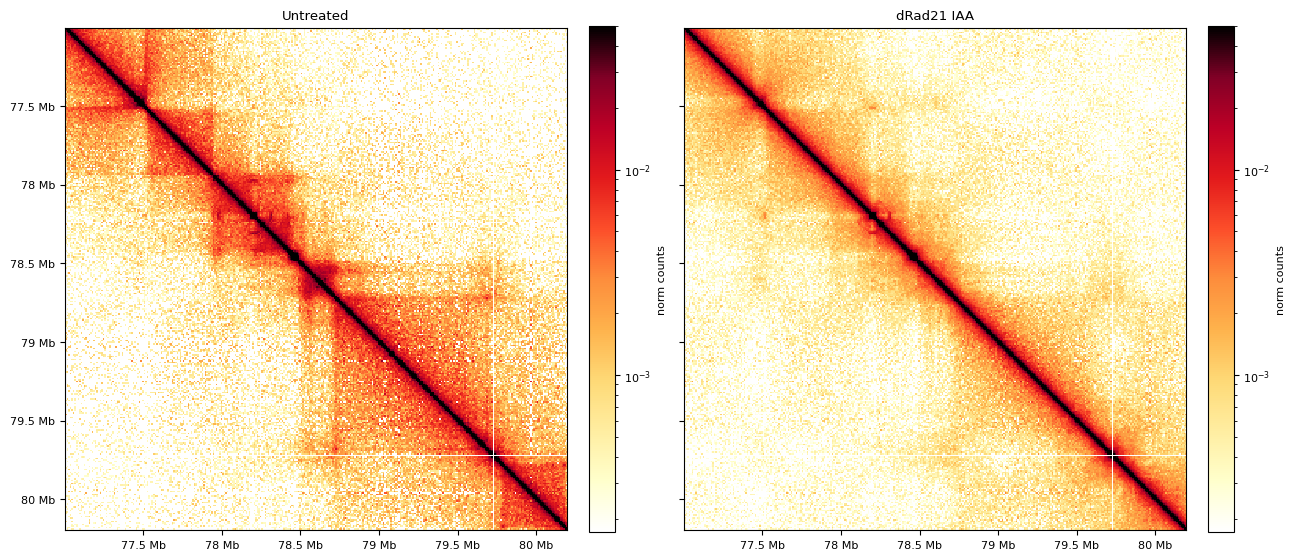

In [41]:
# Complete the region line before executing:

clr_10kb = cooler.Cooler(f'{cool_file_ut}::resolutions/10000')
clr_10kb_rad21 = cooler.Cooler(f'{cool_file_rad21}::resolutions/10000')

region = 'chr1:77000267-80198136' #### you may select any other region from chr1 or chr 12

chrom, start, end = bioframe.parse_region_string(region)
extents = (start, end, end, start)

vmax=5e-2
norm = LogNorm(vmax=vmax)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=1,
    ncols=2,
    sharex=True,
    sharey=True
)

ax = axs[0]
im = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title("Untreated")

ax = axs[1]
im2 = ax.matshow(
    clr_10kb_rad21.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title("dRad21 IAA")

for ax in axs.ravel():
    format_ticks(ax, rotate=False)
plt.tight_layout()

▸ **Practice task.**

Load Wapl and CTCF degraded datasets. Show the same region for them.

⏸ 5-10 minutes: take your time and ask any questions.

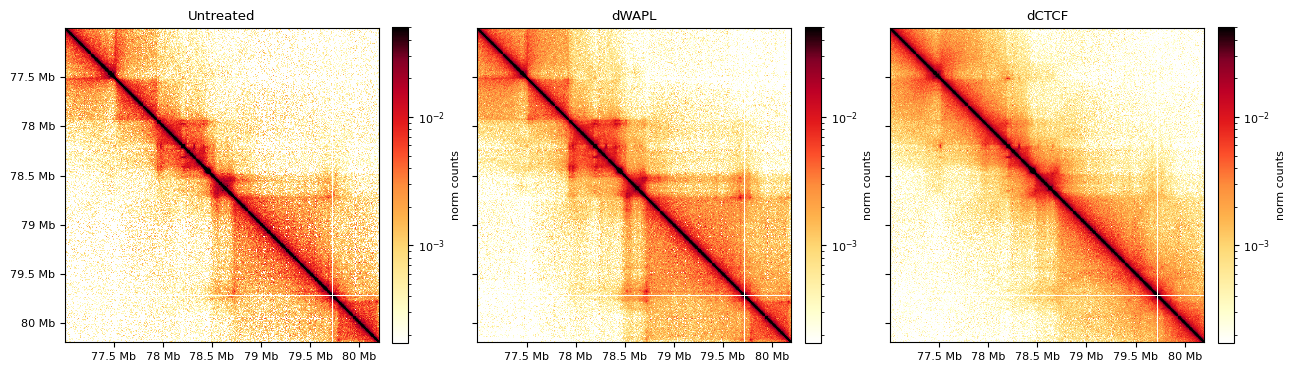

In [43]:
clr_10kb_wapl = cooler.Cooler(f'{cool_file_wapl}::resolutions/10000')
clr_10kb_ctcf = cooler.Cooler(f'{cool_file_ctcf}::resolutions/10000')

region = 'chr1:77000267-80198136' #### you may select any other region from chr1 or chr 12

chrom, start, end = bioframe.parse_region_string(region)
extents = (start, end, end, start)

vmax=5e-2
norm = LogNorm(vmax=vmax)

f, axs = plt.subplots(
    figsize=(13, 10),
    nrows=1,
    ncols=3,
    sharex=True,
    sharey=True
)

ax = axs[0]
im = ax.matshow(
    clr_10kb.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title("Untreated")

ax = axs[1]
im2 = ax.matshow(
    clr_10kb_wapl.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title("dWAPL")

ax = axs[2]
im2 = ax.matshow(
    clr_10kb_ctcf.matrix(balance=True).fetch(region),
    cmap='fall',
    norm=norm,
    extent=extents
);
plt.colorbar(im2, ax=ax, fraction=0.046, pad=0.04, label='norm counts');
ax.set_title("dCTCF")


for ax in axs.ravel():
    format_ticks(ax, rotate=False)
plt.tight_layout()

### 2. Insulation

Insulation is a simple concept, yet a powerful way to look at Hi-C/Micro-C data. Insulation is one aspect of locus-specific contact frequency at small genomic distances, and reflects the segmentation of the genome into domains.

Insulation can be computed with multiple methods. One of the most common methods involves using a diamond-window score to generate an ***insulation profile***. To compute this profile, slide a diamond-shaped window along the genome, with one of the corners on the main diagonal of the matrix, and sum up the contacts within the window for each position.

Insulation profiles reveal that certain locations have lower scores, reflecting lowered contact frequencies between upstream and downstream loci. These positions are often referred to as ***boundaries***, and are also obtained with multiple methods. Here we illustrate one thresholding method for determining boundaries from an insulation profile.

<img src="https://www.biorxiv.org/content/biorxiv/early/2022/11/01/2022.10.31.514564/F4.large.jpg"
     alt="Insulation and boundaries"
     style="float: left; margin-right: 10px;" />
     

#### 2.1. Calculate genome-wide contact insulation
Here we load the Micro-C data at 10 kbp resolution and calculate insulation score with 4 different window sizes.

In [47]:
import cooltools.lib.plotting
from cooltools import insulation

In [48]:
resolution = 10_000
clr_10k = cooler.Cooler(f'{cool_file_ut}::resolutions/{resolution}')
windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
insulation_table = insulation(clr_10k, windows, verbose=True)

In [49]:
windows # These are insulation windows that we will run analysis with

[30000, 50000, 100000, 250000]

`insulation_table` is a dataframe where rows correspond to genomic bins of the cooler.

The columns of this insulation dataframe report the insulation score, the number of valid (non-nan) pixels, whether the given bin is valid, the boundary prominence (strength) and whether locus is called as a boundary after thresholding, for each of the window sizes provided to the function.

Below we print the information returned for any window size, as well as the specific information for the largest window used:

In [53]:
first_window_summary = insulation_table.columns[[ str(windows[-1]) in i for i in insulation_table.columns]]

insulation_table[['chrom','start','end','region','is_bad_bin']+list(first_window_summary)].iloc[1000:1007]
# Note how insulation boundary looks like in this dataset

chrom     start       end region  is_bad_bin  \
1000  chr1  10000000  10010000   chr1       False   
1001  chr1  10010000  10020000   chr1       False   
1002  chr1  10020000  10030000   chr1       False   
1003  chr1  10030000  10040000   chr1       False   
1004  chr1  10040000  10050000   chr1       False   
1005  chr1  10050000  10060000   chr1       False   
1006  chr1  10060000  10070000   chr1       False   

      log2_insulation_score_250000  n_valid_pixels_250000  \
1000                      0.245346                  622.0   
1001                      0.213376                  622.0   
1002                      0.181971                  622.0   
1003                      0.166567                  622.0   
1004                      0.153019                  622.0   
1005                      0.159282                  622.0   
1006                      0.151314                  622.0   

      boundary_strength_250000  is_boundary_250000  
1000                       NaN               False  
1001                       NaN               False  
1002                       NaN               False  
1003                       NaN               False  
1004                  0.006262               False  
1005                       NaN               False  
1006                       NaN               False

Let's visualize insulation. For that, we will rotate the contact matrix by 45 degrees, and we need some custom (yet helpful) code for that:

In [51]:
# Functions to help with plotting
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

Let's see what the insulation track at the highest resolution looks like, next to a rotated Hi-C matrix.

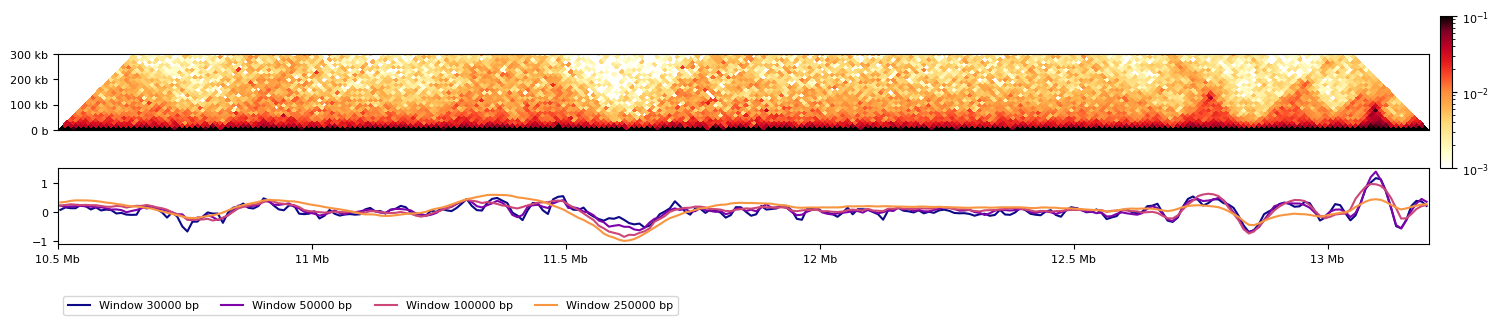

In [52]:
# import additional plotting utilities and set up some parameters:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['font.size'] = 8

# Load the data:
start = 10_500_000
end = start+ 90*windows[0]
region = ('chr1', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr_10k.matrix(balance=True).fetch(region)

# Create the figure:
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

# Select insulation for a region:
insul_region = bioframe.select(insulation_table, region)

# Plot insulation:
ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region.loc[:, ['start', 'end']].mean(axis=1).values,
            insul_region.loc[:, 'log2_insulation_score_'+str(windows[0])].values,
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

# Add multiple resolutions:
for res in windows[1:]:
    ins_ax.plot(insul_region.loc[:, ['start', 'end']].mean(axis=1).values,
                insul_region.loc[:, f'log2_insulation_score_{res}'].values,
                label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

This result highlights how much the result is dependent on window size: smaller windows are sensitive to local structure, whereas large windows capture regions that insulate at larger scales.

#### 2.2. Boundary calling

The insulation table also has annotations for valleys of the insulation score, which correspond to highly insulating regions, such as TAD boundaries. All potential boundaries have an assigned `boundary_strength_` column. Additionally, this strength is thresholded to find regions that insulate particularly strongly, and this is recorded in the `is_boundary_` columns.

Let's repeat the previous plot and show where we found the boundaries:

In [54]:
selected_window_size = 100_000 # More smooth and representative window size

(10500000.0, 13200000.0)

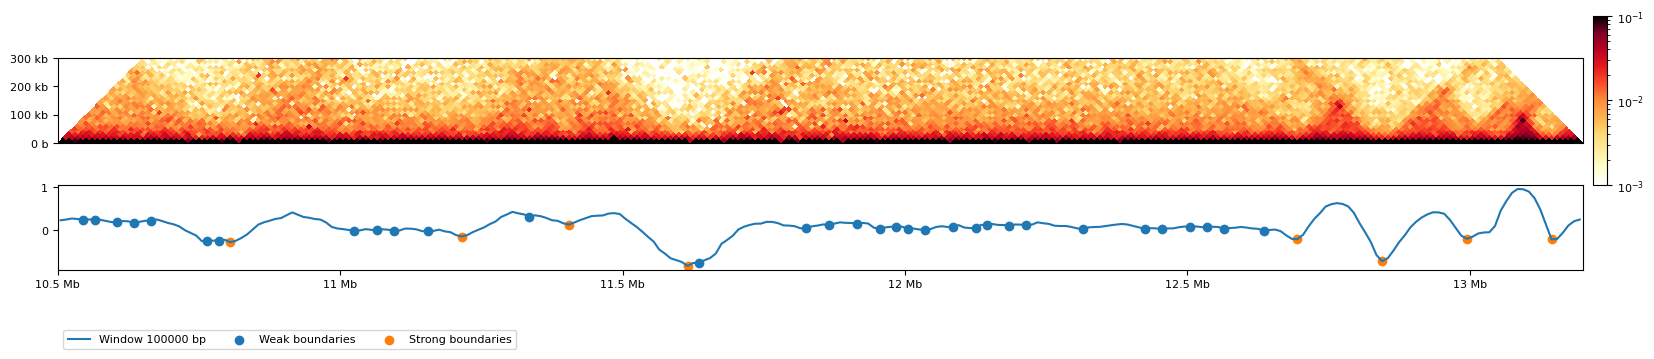

In [55]:
# Create a figure and plot Micro-C on it:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

# Select insulation table for a region:
insul_region = bioframe.select(insulation_table, region)

# Plot insulation:
ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{selected_window_size}'], label=f'Window {selected_window_size} bp')

# Define weak and strong boundaries:
boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{selected_window_size}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{selected_window_size}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{selected_window_size}']]

# Plot the boundaries:
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{selected_window_size}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{selected_window_size}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])


### 3. Pileups

**Pileups** are the average Hi-C maps for fragments of the genome. Procedure of pileup creation is: (1) take target genomic regions, (2) snip the Hi-C map around target regions, (3) average the snippets. Then you can either visualize or measure the strength of interactions around target genomic features.

Let's first take advantage of the boundaries called in untreated Hi-C maps.

#### 3.1. Pileups at insulation boundaries


In [56]:
boundaries = insulation_table[~np.isnan(insulation_table[f'boundary_strength_{selected_window_size}'])]
strong_boundaries = boundaries[boundaries[f'is_boundary_{selected_window_size}']]

In [57]:
len(strong_boundaries)

977

In [58]:
# Let's peek inside out dataframe with boundaries:
strong_boundaries

chrom      start        end region  is_bad_bin  \
315     chr1    3150000    3160000   chr1        True   
365     chr1    3650000    3660000   chr1       False   
434     chr1    4340000    4350000   chr1       False   
476     chr1    4760000    4770000   chr1       False   
490     chr1    4900000    4910000   chr1       False   
...      ...        ...        ...    ...         ...   
31378  chr12  118300000  118310000  chr12       False   
31439  chr12  118910000  118920000  chr12       False   
31495  chr12  119470000  119480000  chr12       False   
31514  chr12  119660000  119670000  chr12        True   
31535  chr12  119870000  119880000  chr12       False   

       log2_insulation_score_30000  n_valid_pixels_30000  \
315                      -0.078788                   4.0   
365                       0.105376                   6.0   
434                      -0.254047                   6.0   
476                      -0.807634                   6.0   
490                       0.293312                   6.0   
...                            ...                   ...   
31378                    -0.556229                   6.0   
31439                    -0.449251                   6.0   
31495                    -0.211660                   6.0   
31514                    -0.254823                   4.0   
31535                     0.001352                   6.0   

       log2_insulation_score_50000  n_valid_pixels_50000  \
315                      -0.010989                  16.0   
365                       0.023228                  22.0   
434                      -0.127646                  22.0   
476                      -0.839045                  22.0   
490                       0.211024                  22.0   
...                            ...                   ...   
31378                    -0.505302                  22.0   
31439                    -0.507482                  22.0   
31495                    -0.073199                  22.0   
31514                    -0.106181                  16.0   
31535                     0.155456                  22.0   

       log2_insulation_score_100000  ...  log2_insulation_score_250000  \
315                        0.207577  ...                      0.744247   
365                       -0.030503  ...                      0.122709   
434                       -0.197046  ...                     -0.467753   
476                       -0.880915  ...                     -0.616697   
490                        0.043181  ...                      0.194504   
...                             ...  ...                           ...   
31378                     -0.355508  ...                     -0.062831   
31439                     -0.832109  ...                     -0.977599   
31495                     -0.067093  ...                     -0.065528   
31514                      0.035345  ...                      0.245860   
31535                      0.194320  ...                      0.845655   

       n_valid_pixels_250000  boundary_strength_30000  \
315                    360.0                 0.573473   
365                    622.0                      NaN   
434                    622.0                      NaN   
476                    622.0                 1.929104   
490                    622.0                      NaN   
...                      ...                      ...   
31378                  622.0                 0.845462   
31439                  622.0                      NaN   
31495                  572.0                 0.453324   
31514                  552.0                 0.750140   
31535                  381.0                      NaN   

       boundary_strength_50000  boundary_strength_250000  \
315                   0.475470                       NaN   
365                        NaN                       NaN   
434                        NaN                       NaN   
476                   2.013092                  1.209804   
490   

In [59]:
flank = 300_000
resolution = 10_000

In [60]:
# Snip the Hi-C matrix with 600-Kb windows centered at the boundaries:
stack = cooltools.pileup(clr_10k, strong_boundaries, flank=flank, nproc=1)

# Aggregate. Note that some pixels might be converted to NaNs after IC, thus we aggregate by nanmean:
mtx = np.nanmean(stack, axis=0)

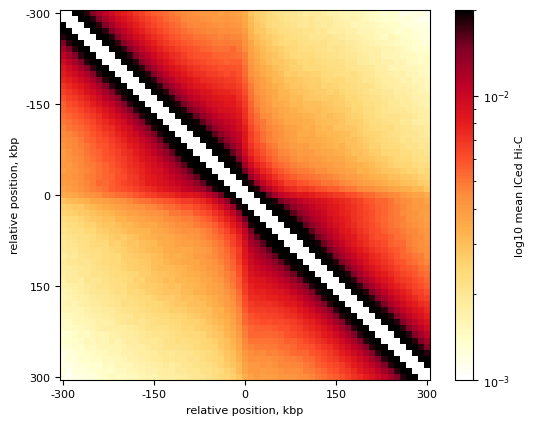

In [61]:
norm = mpl.colors.LogNorm(vmin=1e-3, vmax=0.02)
plt.imshow(
    mtx,
    norm=norm,
    cmap='fall',
    interpolation='none')

plt.colorbar(label = 'log10 mean ICed Hi-C')
ticks_pixels = np.linspace(0, flank*2//resolution,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.show()

▸ **Practice task.**

Create the same pileups for Rad21 and/or Wapl degradation. What are the changes?

⏸ 5-10 minutes: take your time and ask any questions.

In [72]:
# Moify and add the code below (copy and modify the code base from above)
resolution = 10_000
clr_10k_rad21 = cooler.Cooler(f'{cool_file_rad21}::resolutions/{resolution}') # Open cooler file with dRad21 degron (IAA-treated) data
windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
insulation_table = insulation(clr_10k_rad21, windows, verbose=True)

In [73]:
boundaries = insulation_table[~np.isnan(insulation_table[f'boundary_strength_{selected_window_size}'])]
strong_boundaries = boundaries[boundaries[f'is_boundary_{selected_window_size}']]

In [74]:
# Snip the Hi-C matrix with 600-Kb windows centered at the boundaries:
stack = cooltools.pileup(clr_10k_rad21, strong_boundaries, flank=flank, nproc=1)

# Aggregate. Note that some pixels might be converted to NaNs after IC, thus we aggregate by nanmean:
mtx = np.nanmean(stack, axis=0)

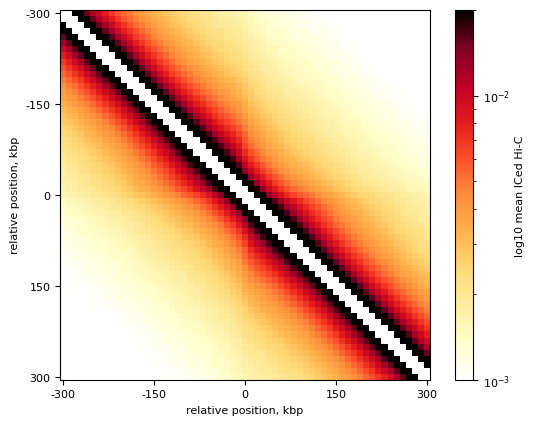

In [75]:
norm = mpl.colors.LogNorm(vmin=1e-3, vmax=0.02)
plt.imshow(
    mtx,
    norm=norm,
    cmap='fall',
    interpolation='none')

plt.colorbar(label = 'log10 mean ICed Hi-C')
ticks_pixels = np.linspace(0, flank*2//resolution,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.show()

Saddle plots for compartment differences GG
Avoid centromere by using eigenvector 1 decreasing after constantly increased values in the beginning

#### 3.2. Pileups at other genomic features

It is frequent that we want to have Hi-C maps averaged over some genomic features: CTCF sites, genes, ChIP-Seq peaks for PTMs, regulatory elements. Let's try to do that for different regulatory elements for mESCs.

We take the the regulatory elements as defined by SCREEN project of [ENCODE](https://www.encodeproject.org/): https://screen.encodeproject.org/

- PLS = Promoter-Like Sites
- pELS = gene-Proximal Enhancer-Like Sites
- dELS = gene-Distal Enhancer-Like Sites
- DNAse = DNAse hypersensitite sites with no distinct epigenetic signature of promoter or enhancer

The corresponding ENCODE entry for mESC CREs: https://www.encodeproject.org/annotations/ENCSR123TBS/

In [ ]:
# Fetch and read CRE genomic regions with bioframe:
df_CREs = bioframe.read_table("https://www.encodeproject.org/files/ENCFF693RIQ/@@download/ENCFF693RIQ.bed.gz", schema="bed12")
df_CREs = df_CREs[["chrom", "start", "end", "blockCount"]].rename({"blockCount": "CRE_type"}, axis=1)

In [ ]:
# Let's look at all the types of CREs:
df_CREs["CRE_type"].unique()

In [ ]:
df_CREs.head()

You may notice that there is no CTCF sites in this annotation, although we know that CTCF is a major contributor to 3D organization. I've prepared CTCF peaks from original Hsieh et al. work re-mapped by MACS2. Let's download it and compare to cis-regulatory elements.

In [ ]:
# Fetch and read CTCF narrow peaks with bioframe:
df_CTCFs = bioframe.read_table("https://osf.io/download/683ecd7aee1ffe6b93d6a622/", schema="narrowPeak")

In [ ]:
len(df_CTCFs)

In [ ]:
df_CTCFs.head()

In [ ]:
sns.distplot( df_CTCFs.fc )

In [ ]:
# Let's select the strongest CTCF sites:
df_CTCFs = df_CTCFs.query('fc>20')

In [ ]:
# Let's sort the bedframe to make it look nice:
df_CTCFs = bioframe.sort_bedframe(df_CTCFs)

df_CTCFs.head()

▸ Practice task.

Create the pileups at CTCF sites.

⏸ 5-10 minutes: take your time and ask any questions.

In [ ]:
# Let's take cooler at smaller resolution:
resolution = 5_000
clr_5kb = cooler.Cooler(f'{cool_file_ut}::resolutions/5000')

# Smaller flank so that we slightly reduce computational time:
flank = 200_000

stack = cooltools.pileup(clr_5kb, df_CTCFs, flank=flank, nproc=1)
mtx = np.nanmean(stack, axis=0)

In [ ]:
norm = mpl.colors.LogNorm(vmin=1e-3, vmax=0.01)
plt.imshow(
    mtx,
    norm=norm,
    cmap='fall',
    interpolation='none')

plt.colorbar(label = 'log10 mean ICed Hi-C')
ticks_pixels = np.linspace(0, flank*2//resolution,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.show()

#### 3.2. Pileups normalized by expected:

The plot above has nice insulation but the signal dominating the plot is scaling (more contacts towards the diagonal). Let's try to get rid of that by calculating the expected and then normalizing (getting **observed over expected** maps).

In [ ]:
# Let's take cooler at smaller resolution:
resolution = 5_000
clr_5kb = cooler.Cooler(f'{cool_file_ut}::resolutions/5000')

df_expected = cooltools.expected_cis(clr_5kb, nproc=1)

In [ ]:
df_expected.head()

Now, let's add expected normalization to the pileup function, and see the result:

In [ ]:
flank = 200_000

stack = cooltools.pileup(clr_5kb, df_CTCFs, flank=flank, nproc=1, expected_df=df_expected)
mtx = np.nanmean(stack, axis=0)

In [ ]:
norm = mpl.colors.LogNorm(vmin=1/1.5, vmax=1.5)
plt.imshow(
    mtx,
    norm=norm,
    cmap='coolwarm',
    interpolation='none')

plt.colorbar(label = 'log OOE Hi-C')
ticks_pixels = np.linspace(0, flank*2//resolution,5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.show()

#### 3.3. Pileups of promoters

Take the CREs. Is it enough to take simply CRE dataframe as an input to see the Hi-C features on them?


In [ ]:
# Example for Promoter-Like sequences:
df_target_sites = df_CREs.query('CRE_type=="PLS"')
df_target_sites.head()

In [ ]:
df_CTCFs.head(n=10)

In [ ]:
### Calculate the distance from each CRE to CTCF:
df_closest = bioframe.closest( df_target_sites, df_CTCFs, suffixes=['', '_CTCF'], return_index=True)
df_closest.head()

In [ ]:
sns.distplot(np.log10(df_closest.query('distance>0')['distance']))
plt.xlabel('log10 distance from CRE to CTCF')

In [ ]:
# CREs that have overlap with CTCF:
df_closest.query('distance>50_000')

In [ ]:
# Select those CREs that do not overlap with CTCFs:
no_close_CTCF = df_closest['distance']>50_000
df_target_cleaned = df_closest.loc[no_close_CTCF, ['chrom', 'start', 'end']]

df_target_cleaned # You can see how we now reduced the number of sites that we are going to plot

Now, when we have cleaned up the dataframe of PLS from CTCFs, let's plot the pileup:

In [ ]:
flank = 200_000
resolution = 5_000

stack = cooltools.pileup(clr_5kb, df_target_cleaned, flank=flank, nproc=1, expected_df=df_expected)
mtx = np.nanmean(stack, axis=0)

In [ ]:
norm = mpl.colors.LogNorm(vmin=1/1.5, vmax=1.5)
plt.imshow(
    mtx,
    norm=norm,
    cmap='coolwarm',
    interpolation='none')

plt.colorbar(label = 'log OOE Hi-C')
ticks_pixels = np.linspace(0, flank*2//resolution, 5)
ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
plt.xticks(ticks_pixels, ticks_kbp)
plt.yticks(ticks_pixels, ticks_kbp)
plt.xlabel('relative position, kbp')
plt.ylabel('relative position, kbp')

plt.show()

It looks like promoters do insulate, although the result looks fairly different from CTCF insulation. What are the key differences?

As an optional task, try to plot the pileups at gene-distal enhancers, compare between untreated, Rad21, CTCF and Wapl degrons.

### 4. Compartments

Compartments is another prominent feature of Hi-C/Micro-C. It involves long-range interactions of genomic loci and can be seen as a checkerboard pattern in maps.

For compartmental calling, we perform eigendecomposition of Hi-C matrices.

Since the orientation of eigenvectors is determined up to a sign, the convention for Hi-C data anaylsis is to orient eigenvectors to be positively correlated with a binned profile of GC content as a 'phasing track'.

In humans and mice, GC content is useful for phasing because it typically has a strong correlation at the 100kb-1Mb bin level with the eigenvector. In other organisms, other phasing tracks have been used to orient
eigenvectors from Hi-C data.



<img src="https://www.biorxiv.org/content/biorxiv/early/2022/11/01/2022.10.31.514564/F2.large.jpg"
     alt="Compartments and saddles"
     style="float: left; margin-right: 10px;" />
     


#### 4.1. Calculating compartmentalization in cis

We first load the Hi-C data at 100 kb resolution.


In [ ]:
resolution = 100_000
clr_100k = cooler.Cooler(f"{cool_file_ut}::resolutions/{resolution}")

Download mouse genome and create the phasing track out of GC-content:

In [ ]:
## fasta sequence is required for calculating binned profile of GC conent
if not os.path.isfile('./mm10.fa'):
    ## note downloading a ~1Gb file can take a couple of minutes:
    subprocess.call('wget https://hgdownload.cse.ucsc.edu/goldenpath/mm10/bigZips/mm10.fa.gz', shell=True,
                    stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
    subprocess.call('gunzip mm10.fa.gz', shell=True,
                    stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# If you run on MacOS, you might need to substitute `wget` with `curl -O`

In [ ]:
bins = clr_100k.bins()[:]
mm10_genome = bioframe.load_fasta('./mm10.fa')

## note the next command may require installing pysam
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm10_genome)
gc_cov.to_csv('mm10_gc_cov_100kb.tsv',index=False,sep='\t')
display(gc_cov)

Cooltools also allows a view to be passed for eigendecomposition to limit to a certain set of regions. The following code creates the simplest view, of the two chromosomes in this cooler.

In [ ]:
view_df = pd.DataFrame({'chrom': clr_100k.chromnames,
                        'start': 0,
                        'end': clr_100k.chromsizes.values,
                        'name': clr_100k.chromnames}
                      )
display(view_df)

To capture the pattern of compartmentalization within-chromosomes, in cis, cooltools `eigs_cis` first removes
the dependence of contact frequency by distance, and then performs eigenedecompostion.

In [ ]:
# obtain first 3 eigenvectors
cis_eigs = cooltools.eigs_cis(clr_100k,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom', 'start', 'end', 'E1']]

Plotting the first eigenvector next to the Hi-C map allows us to see how this captures the plaid pattern.

To better visualize this relationship, we overlay the map with a binary segmentation of the eigenvector. Eigenvectors can be segmented by a variety of methods. The simplest segmentation, shown here, is to simply binarize eigenvectors, and term everything above zero the "A-compartment" and everything below 0 the "B-compartment".


In [ ]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmax=0.1)

im = ax.matshow(
    clr_100k.matrix()[:],
    norm=norm,
    cmap='fall'
);
plt.axis([0, 700, 700, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr1:0-100Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = clr_100k.bins()[:]['weight'].values
ax1.plot([0, 700], [0, 0], 'k',lw=0.25)
ax1.plot( eigenvector_track['E1'].values, label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([]);


for i in np.where(np.diff( (cis_eigs[1]['E1']>0).astype(int)))[0]:
    ax.plot([i, 700], [i, i], 'k', lw=0.5)
    ax.plot([i, i], [0, i], 'k', lw=0.5)

#### 4.2. Compare compartments for untreated and Rad21 degradation

▸ **Practice task.**

Repeat the compartmental calling for Rad21 degradation. Do you see the difference?

⏸ 5-10 minutes: take your time and ask any questions.

Hint: you don't need to re-calculate the GC content for that. Just run cis_eig on the cool file with Rad21 degradation.


In [ ]:
# Your code goes here:
...

### 5. Scaling plots


In Hi-C maps, contact frequency decreases very strongly with **genomic separation** (also referred to as **genomic distance**). In the Hi-C field, this decay is often interchangeably referred to as the:

* **expected** because one "expects" a certain average contact frequency at a given genomic separation
* **scaling** which is borrowed from the polymer physics literature
* **P(s) curve** contact *probability*, *P*, as a function of genomic *separation*, *s*.

The rate of decay of contacts with genomic separation reflects the polymeric nature of chromosomes and can tell us about the global folding patterns of the genome.

This decay has been observed to vary through the cell cycle, across cell types, and after degredation of structural maintenance of chromosomes complexes (SMCs) in both interphase and mitosis.

In this chapter, we will:
* calculate the P(s) of a given cooler
* plot the P(s) curve
* smooth the P(s) curve with logarithmic binning
* plot the derivative of P(s)

We will analyse the data with Rad21 and Wapl degratation in mouse from [Hsieh et al. 2022](https://www.nature.com/articles/s41588-022-01223-8), as above.

Again, these datasets are available through cooltools interface, and we will use just two chromosomes for fast download and computations:

In [ ]:
# Load a Hi-C map at a 1kb resolution from a cooler file.
resolution = 1000 # note this might be slightly slow on a laptop
                  # and could be lowered to 10kb for increased speed
clr = cooler.Cooler(f'{cool_file_ut}::/resolutions/{resolution}')
clr_rad21 = cooler.Cooler(f'{cool_file_rad21}::/resolutions/{resolution}')
clr_wapl = cooler.Cooler(f'{cool_file_wapl}::/resolutions/{resolution}')

Load mouse genome:

In [ ]:
### If you have internet access:
# Use bioframe to fetch the genomic features from the UCSC.
mm10_chromsizes = bioframe.fetch_chromsizes('mm10')
mm10_chromsizes = bioframe.make_viewframe(mm10_chromsizes)

# select only those chromosomes available in cooler
mm10_chromsizes = mm10_chromsizes[mm10_chromsizes.chrom.isin(clr.chromnames)].reset_index(drop=True)
display(mm10_chromsizes.head())

In [ ]:
### Alternative if you're running locally offline:
mm10_chromsizes = bioframe.make_viewframe( clr.chromsizes )

#### 5.1. Calculate the P(s) curves

To calculate the average contact frequency as a function of genomic separation, we use the fact that each diagonal of a Hi-C map records contacts between loci separated by the same genomic distance. For example, the 3rd diagonal of our matrix contains contacts between loci separated by 3-4kb (note that diagonals are 0-indexed). Thus, we calculate the average contact frequency, *P(s)*, at a given genomic distance, *s*, as the average value of all pixels of the corresponding diagonal. This operation is performed by `cooltools.expected_cis`.

Note that for human genome, we would calculate the *P(s)* separately for each chromosomal **arm**, by providing  `hg38_arms` as a `view_df`. This way we will ignore contacts accross the centromere, which is generally a good idea, since such contacts have a slightly different decay versus genomic separation.

In [ ]:
# cvd == contacts-vs-distance
cvd = cooltools.expected_cis(
    clr=clr,
    view_df=mm10_chromsizes,
    smooth=False,
    aggregate_smoothed=False,
    nproc=1 #if you do not have multiple cores available, set to 1
)

This function calculates average contact frequency for raw and normalized interactions ( `count.avg` and `balanced.avg`) for each diagonal and each regions in the `hg38_arms` of a Hi-C map. It aslo keeps the sum of raw and normalized interaction counts (`count.sum` and `balanced.sum`) as well as the number of valid (i.e. non-masked) pixels at each diagonal, `n_valid`.

In [ ]:
display(cvd.head(4))
display(cvd.tail(4))

Note that the data from the first couple of diagonals are masked. This is done intentionally, since interactions at these diagonals (very short-ranged) are contaminated by non-informative Hi-C byproducts - dangling ends and self-circles.

Make sure also to convert distance to basepairs:

In [ ]:
cvd['s_bp'] = cvd['dist'] * resolution

#### 5.2. Plot the P(s) curve

Time to plot *P(s)* !

The first challenge  is that Hi-C has a very wide dynamic range. Hi-C probes genomic separations ranging from 100s to 100,000,000s of basepairs and contact frequencies also tend to span many orders of magnitude.

Plotting such data in the linear scale would reveal only a part of the whole picture. Instead, we typically switch to double logarithmic (aka log-log) plots, where the x and y coordinates vary by orders of magnitude.

With the flags used above, `expected_cis()` does not smooth or aggregate across regions. This can lead to noisy P(s) curves for each region:

In [ ]:
f, ax = plt.subplots(1,1)

for region in mm10_chromsizes['name']:
    ax.loglog(
        cvd['s_bp'].loc[cvd['region1']==region],
        cvd['balanced.avg'].loc[cvd['region1']==region],
        alpha=0.7,
        linewidth=1,
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

#### 5.3. Smoothing & aggregating P(s) curves

We notices how each chromosome gets too noisy signal at its ends. We can improve that by performing aggregation and smoothing of interactions.

We can pass flags to `expected_cis()` that return smoothed and aggregated columns for futher analysis (which are on by default).

In [ ]:
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=mm10_chromsizes,
    smooth=True,
    aggregate_smoothed=True,
    nproc=1
)

In [ ]:
display(cvd_smooth_agg.head(4))

The `balanced.avg.smoothed.agg` is averaged across regions, and shows the same exact curve for each.

In [ ]:
cvd_smooth_agg['s_bp'] = cvd_smooth_agg['dist']* resolution
cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


In [ ]:
f, ax = plt.subplots(1,1)

for region in mm10_chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['s_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed.agg'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

In [ ]:
# Repeat the same for rad21 and wapl degrons:

## Your code goes here:

cvd_smooth_agg_rad21 = cooltools.expected_cis(
    clr=clr_rad21,
    view_df=mm10_chromsizes,
    smooth=True,
    aggregate_smoothed=True,
    nproc=1 # change to larger number of cores if they are available
)

cvd_smooth_agg_wapl = cooltools.expected_cis(
    clr=clr_wapl,
    view_df=mm10_chromsizes,
    smooth=True,
    aggregate_smoothed=True,
    nproc=1 # change to larger number of cores if they are available
)

In [ ]:
## Add resolutions:
cvd_smooth_agg_rad21['s_bp'] = cvd_smooth_agg_rad21['dist'] * resolution
cvd_smooth_agg_rad21.loc[cvd_smooth_agg_rad21['dist'] < 2, 'balanced.avg.smoothed.agg'] = np.nan
cvd_smooth_agg_wapl['s_bp'] = cvd_smooth_agg_wapl['dist'] * resolution
cvd_smooth_agg_wapl.loc[cvd_smooth_agg_wapl['dist'] < 2, 'balanced.avg.smoothed.agg'] = np.nan

In [ ]:
## Your code goes here:
display(cvd_smooth_agg_rad21.head(4))

#### 5.4. Plot the smoothed P(s) curve and its derivative

Logbin-smoothing of P(s) reduces the "fanning" at longer s and enables us to plot the derivative of the P(s) curve in the log-log space. This derivative is extremely informative, as it can be compared to predictions from various polymer models.

In [ ]:
# Just take a single value for each genomic separation
cvd_merged = cvd_smooth_agg.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]

# Calculate derivative in log-log space
der = np.gradient(np.log(cvd_merged['balanced.avg.smoothed.agg']),
                  np.log(cvd_merged['s_bp']))


In [ ]:
f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)


ax = axs[0]
ax.loglog(
    cvd_merged['s_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="Untreated",
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)
ax.legend()


ax = axs[1]
ax.semilogx(
    cvd_merged['s_bp'],
    der,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

▸ **Practice task.**

Calculate contact-versus-distance and derivatives for Rad21 and Wapl degrons.  

⏸ 5-10 minutes: take your time and ask any questions.

In [ ]:
# Repeat the same for rad21 and wapl:

# Repeat for degrons:
cvd_merged_rad21 = cvd_smooth_agg_rad21.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]
der_rad21 = np.gradient(
    np.log(cvd_merged_rad21['balanced.avg.smoothed.agg']),
    np.log(cvd_merged_rad21['s_bp']))

cvd_merged_wapl = cvd_smooth_agg_wapl.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]
der_wapl = np.gradient(
    np.log(cvd_merged_wapl['balanced.avg.smoothed.agg']),
    np.log(cvd_merged_wapl['s_bp']))

In [ ]:
f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)


ax = axs[0]
ax.loglog(
    cvd_merged['s_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="Untreated",
)
ax.loglog(
    cvd_merged_rad21['s_bp'],
    cvd_merged_rad21['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="Rad21 Degron",
)
ax.loglog(
    cvd_merged_wapl['s_bp'],
    cvd_merged_wapl['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="WAPL Degron",
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)
ax.legend()


ax = axs[1]
ax.semilogx(
    cvd_merged['s_bp'],
    der,
    alpha=0.5
)
ax.semilogx(
    cvd_merged_rad21['s_bp'],
    der_rad21,
    alpha=0.5
)
ax.semilogx(
    cvd_merged_wapl['s_bp'],
    der_wapl,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)

▸ **Practice task (optional).**

Compare contact-versus-distance and derivatives for Rad21, Wapl and CTCF degrons.

Does the average loop size changes when CTCF is degraded?

Hint: Read dCTCF-IAA data and add to the visualization.

⏸ 10-15 minutes: take your time and ask any questions.

In [ ]:
# Read cooler for dCTCF_IAA
clr_ctcf = ...

In [ ]:
### Generated table of expected:
cvd_smooth_agg_ctcf = cooltools.expected_cis(
    clr=clr_ctcf,
    view_df=mm10_chromsizes,
    smooth=True,
    aggregate_smoothed=True,
    nproc=1 # change to larger number of cores if they are available
)

cvd_smooth_agg_ctcf['s_bp'] = cvd_smooth_agg_ctcf['dist'] * resolution
cvd_smooth_agg_ctcf.loc[cvd_smooth_agg_ctcf['dist'] < 2, 'balanced.avg.smoothed.agg'] = np.nan

cvd_merged_ctcf = cvd_smooth_agg_ctcf.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]

In [ ]:
### Calculate derivative:
der_ctcf = np.gradient(
    np.log(cvd_merged_ctcf['balanced.avg.smoothed.agg']),
    np.log(cvd_merged_ctcf['s_bp']))

In [ ]:
### Plot:
f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)


ax = axs[0]
ax.loglog(
    cvd_merged['s_bp'],
    cvd_merged['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="Untreated",
)
ax.loglog(
    cvd_merged_rad21['s_bp'],
    cvd_merged_rad21['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="Rad21 Degron",
)
ax.loglog(
    cvd_merged_wapl['s_bp'],
    cvd_merged_wapl['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="WAPL Degron",
)
ax.loglog(
    cvd_merged_ctcf['s_bp'],
    cvd_merged_ctcf['balanced.avg.smoothed.agg'],
    '-',
    markersize=5,
    label="CTCF Degron",
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(1e3,1e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)
ax.legend()


ax = axs[1]
ax.semilogx(
    cvd_merged['s_bp'],
    der,
    alpha=0.5
)
ax.semilogx(
    cvd_merged_rad21['s_bp'],
    der_rad21,
    alpha=0.5
)
ax.semilogx(
    cvd_merged_wapl['s_bp'],
    der_wapl,
    alpha=0.5
)
ax.semilogx(
    cvd_merged_ctcf['s_bp'],
    der_ctcf,
    alpha=0.5
)

ax.set(
    xlabel='separation, bp',
    ylabel='slope')

ax.grid(lw=0.5)